# 回归分析

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

导入数据：

In [2]:
diabetes = datasets.load_diabetes()
# 只取数据集第3列作为因变量数据
# diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X = diabetes.data

In [3]:
# 将数据划分为训练集和测试集
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

## 1. 普通最小二乘法

构建模型：

In [4]:
reg = linear_model.LinearRegression()

训练模型：

In [5]:
reg.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

对测试数据集进行预测：

In [6]:
diabetes_y_pred = reg.predict(diabetes_X_test)

回归系数：

In [7]:
reg.coef_

array([  3.03499549e-01,  -2.37639315e+02,   5.10530605e+02,
         3.27736980e+02,  -8.14131709e+02,   4.92814588e+02,
         1.02848452e+02,   1.84606489e+02,   7.43519617e+02,
         7.60951722e+01])

截距项：

In [8]:
reg.intercept_

152.76430691633442

均方差：

In [9]:
mean_squared_error(diabetes_y_test, diabetes_y_pred)

2004.5676026898229

模型得分：

In [10]:
r2_score(diabetes_y_test, diabetes_y_pred)

0.58507530226905691

## 2. 岭回归

构建岭回归模型：

In [11]:
reg = linear_model.Ridge(alpha=0.5, normalize=True)
reg.fit(diabetes_X_train, diabetes_y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

对测试数据集进行预测

In [12]:
diabetes_y_pred = reg.predict(diabetes_X_test)

回归系数

In [13]:
reg.coef_

array([  26.66665999, -130.9015535 ,  377.85929784,  246.47462955,
        -16.46777194,  -56.73552756, -179.39374153,  124.3070593 ,
        319.22920459,  117.36273727])

截距项：

In [14]:
reg.intercept_

152.93660729576612

均方差：

In [15]:
mean_squared_error(diabetes_y_test, diabetes_y_pred)

2370.5909888990982

模型得分（拟合优度）：

In [16]:
r2_score(diabetes_y_test, diabetes_y_pred)

0.5093122585674873

比较不同alpha值下的回归系数：

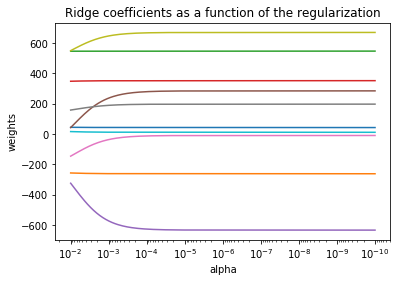

In [17]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False, normalize=True)
    ridge.fit(diabetes_X_train, diabetes_y_train)
    coefs.append(ridge.coef_)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

设置正则化参数alpha，即交叉验证自动选择最优alpha建立模型

In [19]:
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg.fit(diabetes_X_train, diabetes_y_train)
reg.alpha_

0.10000000000000001

In [20]:
reg.coef_

array([  11.1136556 , -204.19946801,  480.69629861,  303.83348865,
        -88.06728559,  -66.87260956, -193.14729968,  119.53475526,
        430.10894133,   95.56293006])

对比：

In [21]:
reg = linear_model.Ridge(alpha=0.1)
reg.fit(diabetes_X_train, diabetes_y_train)
reg.coef_

array([  11.1136556 , -204.19946801,  480.69629861,  303.83348865,
        -88.06728559,  -66.87260956, -193.14729968,  119.53475526,
        430.10894133,   95.56293006])

## 3. Lasso回归

手动设置alpha，建立模型：

In [22]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(diabetes_X_train, diabetes_y_train)
reg.coef_

array([   0.        , -153.88667105,  508.67446975,  281.35649556,
        -51.0115067 ,   -0.        , -219.74128855,    0.        ,
        469.11520313,   46.03782743])

通过交叉验证，自动设置alpha，建立模型：

In [23]:
reg = linear_model.LassoCV()
reg.fit(diabetes_X_train, diabetes_y_train)
print(reg.alpha_)
reg.coef_

0.0346286796426


array([   0.        , -204.39940687,  515.96287229,  308.90486341,
       -134.69542498,   -0.        , -207.64361595,   39.0260751 ,
        504.19981308,   69.21396092])

基于最小角回归算法的lasso回归：

In [24]:
reg = linear_model.LassoLars(alpha=0.0427613759102)
reg.fit(diabetes_X_train, diabetes_y_train)
reg.coef_

array([   0.        , -198.45750306,  514.94326768,  305.24347792,
       -114.00546204,    0.        , -224.68900625,   14.60543385,
        500.4665208 ,   67.41413512])

In [25]:
reg = linear_model.LassoLarsCV()
reg.fit(diabetes_X_train, diabetes_y_train)
print(reg.alpha_)
reg.coef_

0.0427613759102


array([   0.        , -198.45750306,  514.94326768,  305.24347792,
       -114.00546204,    0.        , -224.68900625,   14.60543385,
        500.4665208 ,   67.41413512])

基于信息标准的模型选择

In [ ]:
import time 
EPSILON = 1e-4
X = diabetes.data
y = diabetes.target
rng = np.random.RandomState(42)


In [27]:
X = np.c_[X, rng.randn(X.shape[0], 14)]
X /= np.sqrt(np.sum(X ** 2, axis=0))

基于BIC准则的最小角度回归：

In [28]:
model_bic = linear_model.LassoLarsIC(criterion='bic')
t1 =  time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

基于AIC准则的最小角度回归：

In [29]:
model_aic= linear_model.LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_

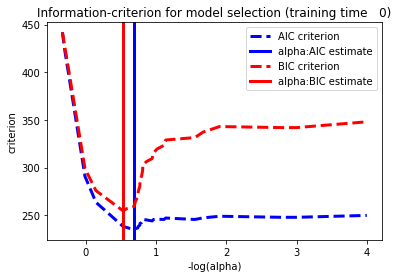

In [30]:
def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_  = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color = color, linewidth = 3, label = '%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color = color, linewidth=3, label='alpha:%s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')
    
plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %3.f)' % t_bic)

## 4. 弹性网络

弹性网络是一种使用L1和L2范数作为先验正则项训练的线性回归模型

In [32]:
reg = linear_model.ElasticNetCV(cv = 5, random_state=0)
reg.fit(X, y)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [33]:
reg.alpha_

0.0042960871510589966

In [35]:
reg.coef_

array([  27.04056328,  -85.24540728,  310.79090502,  201.7174017 ,
          3.13172979,  -28.18300877, -156.39748708,  115.52594875,
        263.91709252,  119.29088218,  -14.37773537,  -37.6611644 ,
         10.74662894,  -19.78967918,  -43.62991071,   44.13066344,
          0.77396314,  -44.49170178,  -10.87861706,   33.9890607 ,
         48.24108166,   38.81150581,   59.6601214 ,   31.18251933])

In [36]:
reg.l1_ratio_

0.5

手动设置alpha和l1_ratio

In [37]:
reg = linear_model.ElasticNet(alpha=0.0042960871510589966, l1_ratio=0.5)
reg.fit(X, y)

ElasticNet(alpha=0.0042960871510589966, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [38]:
reg.coef_

array([  27.04056328,  -85.24540728,  310.79090502,  201.7174017 ,
          3.13172979,  -28.18300877, -156.39748708,  115.52594875,
        263.91709252,  119.29088218,  -14.37773537,  -37.6611644 ,
         10.74662894,  -19.78967918,  -43.62991071,   44.13066344,
          0.77396314,  -44.49170178,  -10.87861706,   33.9890607 ,
         48.24108166,   38.81150581,   59.6601214 ,   31.18251933])